# <font color = lightcoral>Inference Testing
>    
### <font color = red> Non-Overlapping Windows

> From transformer models
>

## <font color = grey> Admin

In [1]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
import time
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

import warnings
warnings.simplefilter("ignore")


Base directory set to: /home/sagemaker-user


---

# <font color = lightsteelblue> 4 Key Files

In [ ]:
# import pandas as pd
# import time

# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'

# ################################## Part 1: Parsed Raw File ###################################

# print("\n" + "*"*100)
# print("********************** Part1 1: Parsed Raw File ******************************************")
# print("*"*100 + "\n")

# parsed_file =  f"{data_dir}/BGL.log_structured.csv"
# parsed_file_df = pd.read_csv(parsed_file)
# display(parsed_file_df.head())

# ######################### Part 2: Encoded File with Feature for Model Training  ######################

# print("\n" + "*"*100)
# print("********************** Part 2:  Input Data with Features ******************************************")
# print("*"*100 + "\n")

# encoded_feature_input_file = f"{data_dir}/20240709_full_more_new_features_v1.00.parquet"
# encoded_feature_input_file_df = pd.read_parquet(encoded_feature_input_file)
# display(encoded_feature_input_file_df.iloc[:, :20].head())

# # ######################### Part 3: Event_ID to Template Mapping  #######################################

# print("\n" + "*"*100)
# print("********************** Part 3: Event_ID to Template Mapping ******************************************")
# print("*"*100 + "\n")

# eventid_template_file = f"{data_dir}/20240711_Template_to_EventID_Mapping_v1.00.csv"
# eventid_template_df = pd.read_csv(eventid_template_file)
# display(eventid_template_df.head())

# # ######################### Part 4: Event_ID to Encoding Mapping  #######################################

# print("\n" + "*"*100)
# print("********************** Part 4:  Event_ID to Encoding Mapping ******************************************")
# print("*"*100 + "\n")

# eventid_encoding_file = f"{data_dir}/20240711_EventID_to_EncodedInteger_Mapping_v1.00.csv"
# eventid_encoding_df = pd.read_csv(eventid_encoding_file)
# display(eventid_encoding_df.head())

---

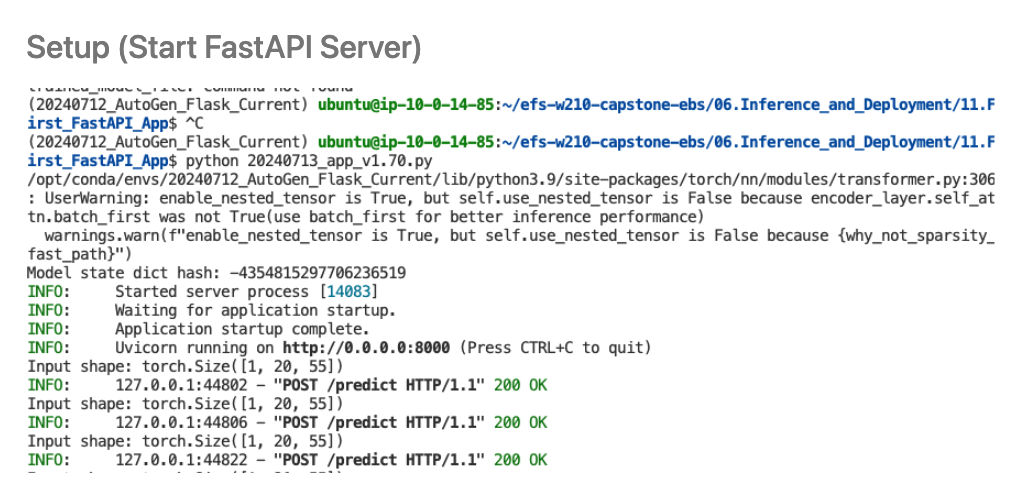

## Run

Total records in X_test: 127
Total records in y_test: 127
Shape of X_test: (127, 20, 56)
Shape of y_test: (127,)


Shape of input being sent to API: (20, 55)
Shape of input being sent to API: (20, 55)
Shape of input being sent to API: (20, 55)
Shape of input being sent to API: (20, 55)
Shape of input being sent to API: (20, 55)
Shape of input being sent to API: (20, 55)
Shape of input being sent to API: (20, 55)
Shape of input being sent to API: (20, 55)
Shape of input being sent to API: (20, 55)
Shape of input being sent to API: (20, 55)
Shape of input being sent to API: (20, 55)
Shape of input being sent to API: (20, 55)
Shape of input being sent to API: (20, 55)
Shape of input being sent to API: (20, 55)
Shape of input being sent to API: (20, 55)
Shape of input being sent to API: (20, 55)
Shape of input being sent to API: (20, 55)
Shape of input being sent to API: (20, 55)
Shape of input being sent to API: (20, 55)
Shape of input being sent to API: (20, 55)
Shape of input being sent

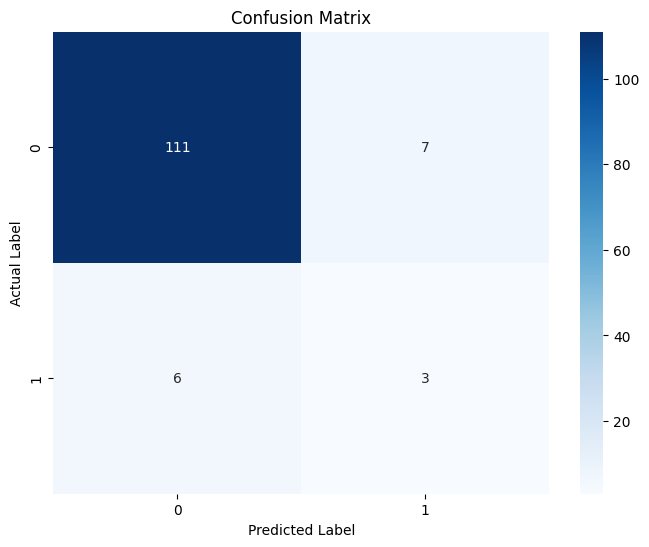

In [2]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Parameters
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files'
file_prefix = "20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix
n_records = 127  # Number of records to process

# Load the test data
X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# Print total records and shapes
print(f"Total records in X_test: {X_test.shape[0]}")
print(f"Total records in y_test: {y_test.shape[0]}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")
print("\n" + "="*50 + "\n")

# Drop the first column from X_test
X_test = X_test[:, :, 1:]

# Initialize lists to store results
raw_outputs = []
sigmoid_outputs = []
thresholded_predictions = []
actual_labels = []
input_shapes = []

# Loop through the first n records
for i in range(min(n_records, len(X_test))):
    # Prepare input
    sample_input = X_test[i].tolist()
    print(f"Shape of input being sent to API: {np.array(sample_input).shape}")
    
    # Make a POST request to the API
    response = requests.post('http://localhost:8000/predict', json={'sequence': sample_input})
    
    # Extract predictions
    pred_data = response.json()
    raw_outputs.append(pred_data['raw_output'])
    sigmoid_outputs.append(pred_data['sigmoid_output'])
    thresholded_predictions.append(pred_data['thresholded_prediction'])
    actual_labels.append(y_test[i])
    input_shapes.append(pred_data['input_shape'])

# Print debugging information
print("First 10 raw outputs:")
print(raw_outputs[:10])
print("First 10 sigmoid outputs:")
print(sigmoid_outputs[:10])
print("First 10 thresholded predictions:")
print(thresholded_predictions[:10])
print("First 10 actual labels:")
print(actual_labels[:10])
print("First 10 input shapes:")
print(input_shapes[:10])

# Create DataFrame
results_df = pd.DataFrame({
    'Raw Output': raw_outputs,
    'Sigmoid Output': sigmoid_outputs,
    'Predicted Label': thresholded_predictions,
    'Actual Label': actual_labels,
    'Input Shape': input_shapes
})

# Display the DataFrame
print("Results for the first", n_records, "records:")
print(results_df)
print("\n" + "="*50 + "\n")

# Calculate metrics
accuracy = accuracy_score(results_df['Actual Label'], results_df['Predicted Label'])
precision_class_1 = precision_score(results_df['Actual Label'], results_df['Predicted Label'], pos_label=1)
recall_class_1 = recall_score(results_df['Actual Label'], results_df['Predicted Label'], pos_label=1)
f1 = f1_score(results_df['Actual Label'], results_df['Predicted Label'], average='binary')

# Calculate confusion matrix
cm = confusion_matrix(results_df['Actual Label'], results_df['Predicted Label'])
tn, fp, fn, tp = cm.ravel()

# Create a metrics DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1 Score', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'],
    'Value': [accuracy, precision_class_1, recall_class_1, f1, tp, fp, tn, fn]
})

# Display the metrics
print("Metrics:")
print(metrics_df.to_string(index=False))
print("\n" + "="*50 + "\n")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

---

# <font color = pink> Model Eval from saved model (#72)
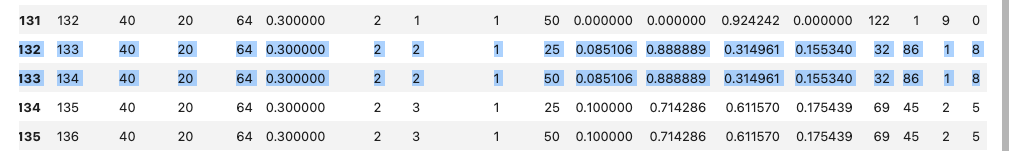

# <font color = gold> Inference Works! --> Two Shots (Save and Test)

## <font color = grey> Part 1. Generate and Save the Test File

In [ ]:
# import os
# import pandas as pd
# import numpy as np
# import random
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split
# from datetime import datetime

# # Parameters
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/12.20240709_More_New_Features/01.Full_Base'
# input_file = f"{data_dir}/20240709_full_more_new_features_v1.00.parquet"
# output_dir = '/home/ubuntu/efs-w210-capstone-ebs/11.Data/01.BGL/12.20240709_More_New_Features/05.Inference_Eval'

# # Generate timestamp and serial number
# timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
# serial_number = "0001"  # You can increment this for each run
# file_prefix = f"{timestamp}_non_overlap_full_test"

# # Required parameters
# max_events = 40
# input_length = 20
# gap = 2
# prediction_period = 1
# test_size = 0.2
# shuffle = False
# random_seed = 42

# # Set random seed for reproducibility
# np.random.seed(random_seed)
# random.seed(random_seed)

# # Data Preprocessing
# df = pd.read_parquet(input_file)

# selected_columns = ['time_start_int', 'Class', 'unique_events', 'most_frequent_event', 'transitions', 'entropy', 
#                     'hour_of_day', 'day_of_week', 'event_count', 'top_event_frequency', 'prev_event_count', 
#                     'transition_rate', 'high_transition_rate', 'prev_entropy', 'entropy_change', 
#                     'rolling_event_count', 'rolling_unique_event_count']
# event_id_columns = [col for col in df.columns if col.startswith('EventId_')]

# df[event_id_columns].replace(-1, 0, inplace=True)

# scaler = StandardScaler()
# numerical_features = ['unique_events', 'transitions', 'entropy', 'hour_of_day', 'day_of_week', 'event_count', 
#                       'top_event_frequency', 'prev_event_count', 'transition_rate', 'prev_entropy', 
#                       'entropy_change', 'rolling_event_count', 'rolling_unique_event_count']
# df[selected_columns[2:]] = scaler.fit_transform(df[selected_columns[2:]])

# label_encoder = LabelEncoder()
# df['most_frequent_event'] = label_encoder.fit_transform(df['most_frequent_event'])

# pca = PCA(n_components=max_events)
# event_id_pca = pca.fit_transform(df[event_id_columns])
# event_id_pca_df = pd.DataFrame(event_id_pca, columns=[f'EventId_PCA_{i+1}' for i in range(max_events)])

# df_reduced = pd.concat([df[selected_columns], event_id_pca_df], axis=1)

# def create_sequences(data, time_index_col, feature_cols, target_col, input_length, gap=2, prediction_period=1):
#     sequences = []
#     targets = []
    
#     start_idx = 0
#     total_length = len(data)
#     while start_idx + input_length + gap + prediction_period <= total_length:
#         end_idx = start_idx + input_length
#         sequence = data[feature_cols].iloc[start_idx:end_idx].values
#         target = data[target_col].iloc[end_idx + gap:end_idx + gap + prediction_period].values[0]
#         sequences.append(sequence)
#         targets.append(target)
#         start_idx = end_idx + gap + prediction_period
    
#     return np.array(sequences), np.array(targets)

# feature_cols = [col for col in df_reduced.columns if col != 'Class']
# target_col = 'Class'

# X, y = create_sequences(df_reduced, 'time_start_int', feature_cols, target_col, input_length=input_length, gap=gap, prediction_period=prediction_period)

# _, X_test, _, y_test = train_test_split(X, y, test_size=test_size, shuffle=shuffle, random_state=random_seed)

# # Save the test data
# np.save(f"{output_dir}/{file_prefix}_X_test.npy", X_test)
# np.save(f"{output_dir}/{file_prefix}_y_test.npy", y_test)

# print(f"Test data saved to {output_dir}")
# print(f"X_test shape: {X_test.shape}")
# print(f"y_test shape: {y_test.shape}")
# print(f"File prefix: {file_prefix}")

## <font color = grey> Part 2. Load the Test File and Evaluate the Model

In [3]:
import os
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Parameters
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04C.Local_Inference_Eval_Files'
model_folder_path = '/home/ubuntu/efs-w210-capstone-ebs/04B.Local_Model_Files/20240713_Non_Overlapping_Consl_180_FINAL'
trained_model_file = f"{model_folder_path}/20240712_Transformers_Non_Overlapping_run_133_of_180.pt"

# File prefix (should match the one used in Part 1)
file_prefix = "20240714_062624_non_overlap_full_test"  # Replace with the actual prefix from Part 1

# Model parameters
input_length = 20
hidden_size = 64
dropout = 0.3
num_layers = 2

# Load the test data
X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# Drop the first column from X_test
X_test = X_test[:, :, 1:]

# Transformer Model Definition
class TransformerModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.5):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_size, hidden_size)
        self.pos_encoder = nn.Embedding(input_length, hidden_size)
        self.transformer = nn.Transformer(hidden_size, nhead=4, num_encoder_layers=num_layers, num_decoder_layers=num_layers, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.embedding(x)
        positions = torch.arange(0, x.size(1), device=x.device).unsqueeze(0)
        x = x + self.pos_encoder(positions)
        x = self.transformer(x, x)
        x = self.fc(x[:, -1, :])
        return x

# Model Evaluation
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
input_size = X_test.shape[2]
model = TransformerModel(input_size, hidden_size, num_layers, 1, dropout)
model.load_state_dict(torch.load(trained_model_file))
model.eval()
torch.set_grad_enabled(False)
print(f"Model state dict hash: {hash(frozenset(model.state_dict().items()))}")

with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_outputs_sigmoid = torch.sigmoid(test_outputs)
    test_outputs_numpy = test_outputs_sigmoid.cpu().numpy()
    test_preds = (test_outputs_numpy > 0.5).astype(int)

# Print debugging information
print("First 10 raw outputs:")
print(test_outputs[:10])
print("First 10 sigmoid outputs:")
print(test_outputs_sigmoid[:10])
print("First 10 predictions:")
print(test_preds[:10])
print("First 10 actual labels:")
print(y_test[:10])

conf_matrix = confusion_matrix(y_test_tensor.cpu().numpy(), test_preds)
precision = precision_score(y_test_tensor.cpu().numpy(), test_preds, zero_division=0)
recall = recall_score(y_test_tensor.cpu().numpy(), test_preds, zero_division=0)
accuracy = accuracy_score(y_test_tensor.cpu().numpy(), test_preds)
f1 = f1_score(y_test_tensor.cpu().numpy(), test_preds, zero_division=0)
tn, fp, fn, tp = conf_matrix.ravel()

print(f"Evaluation Results: Precision={precision:.6f}, Recall={recall:.6f}, Accuracy={accuracy:.6f}, F1={f1:.6f}, TN={tn}, FP={fp}, FN={fn}, TP={tp}")

Model state dict hash: 954889977578331920
First 10 raw outputs:
tensor([[-0.0167],
        [-0.0167],
        [ 0.0024],
        [ 0.0568],
        [ 0.0633],
        [ 0.0280],
        [-0.0738],
        [-0.0167],
        [-0.0641],
        [-0.0168]])
First 10 sigmoid outputs:
tensor([[0.4958],
        [0.4958],
        [0.5006],
        [0.5142],
        [0.5158],
        [0.5070],
        [0.4816],
        [0.4958],
        [0.4840],
        [0.4958]])
First 10 predictions:
[[0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]
First 10 actual labels:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Evaluation Results: Precision=0.085106, Recall=0.888889, Accuracy=0.314961, F1=0.155340, TN=32, FP=86, FN=1, TP=8


---